In [ ]:
pip install mlxtend --upgrade --no-deps

In [ ]:
import numpy as np
import time
import matplotlib.pyplot as plt
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules,fpgrowth
from mlxtend.preprocessing import TransactionEncoder
import csv


In [ ]:
projectData=[]
with open('mushroom.dat') as f:
    dataset = csv.reader(f, delimiter=' ')
    for row in dataset:
        projectData.append([element for element in row][:-1])

In [ ]:
fpTimes = list()
fpElements = list()
minSupport = .3
minSupportIncVal = 0.05
while minSupport <=1:
  fpStart = time.process_time()
  te = TransactionEncoder()
  te_ary = te.fit(projectData).transform(projectData)
  df = pd.DataFrame(te_ary, columns=te.columns_)
  result= fpgrowth(df, min_support= minSupport, use_colnames=True)
  fpEnd = time.process_time()

  #push data
  fpElements.append(minSupport)
  fpTimes.append(fpEnd-fpStart)
  print(f"Runtime of the program is {minSupport*100} {fpEnd - fpStart}")  
  #print (result)
  # total time taken
  #print(f"Runtime of the program is {end - start}")
  minSupport += minSupportIncVal

Runtime of the program is 30.0 0.2794588220000005
Runtime of the program is 35.0 0.23028558999999937
Runtime of the program is 40.0 0.2114371119999987
Runtime of the program is 44.99999999999999 0.19812159399999985
Runtime of the program is 49.99999999999999 0.18157486499999997
Runtime of the program is 54.99999999999999 0.1709971880000012
Runtime of the program is 60.0 0.1608185010000014
Runtime of the program is 65.0 0.16410142200000166
Runtime of the program is 70.0 0.15223775899999836
Runtime of the program is 75.00000000000001 0.15510814199999956
Runtime of the program is 80.00000000000001 0.2458894640000011
Runtime of the program is 85.00000000000001 0.15085463800000198
Runtime of the program is 90.00000000000003 0.1476447229999991
Runtime of the program is 95.00000000000003 0.15158249299999937


In [ ]:
apTimes = list()
apElements = list()
minSupport = .3
minSupportIncVal = 0.05
while minSupport <=1:
  apStart = time.process_time()
  te = TransactionEncoder()
  te_ary = te.fit(projectData).transform(projectData)
  df = pd.DataFrame(te_ary, columns=te.columns_)
  result= apriori(df, min_support= minSupport, use_colnames=True)
  apEnd = time.process_time()
  
  #push data
  apElements.append(minSupport)
  apTimes.append(apEnd-apStart)

  print(f"Runtime of the program is {minSupport*100} {apEnd - apStart}")

  #sum min support incremental value
  minSupport += minSupportIncVal

  #print (result)
  # total time taken
  #print(f"Runtime of the program is {end - start}")
  

Runtime of the program is 30.0 0.583714962000002
Runtime of the program is 35.0 0.24027968100000052
Runtime of the program is 40.0 0.15224051999999944
Runtime of the program is 44.99999999999999 0.11903854200000197
Runtime of the program is 49.99999999999999 0.08360298499999885
Runtime of the program is 54.99999999999999 0.07706920299999709
Runtime of the program is 60.0 0.08457198900000051
Runtime of the program is 65.0 0.07729655899999699
Runtime of the program is 70.0 0.07369338999999897
Runtime of the program is 75.00000000000001 0.07520845400000198
Runtime of the program is 80.00000000000001 0.06827618000000157
Runtime of the program is 85.00000000000001 0.07063290099999975
Runtime of the program is 90.00000000000003 0.06859008700000047
Runtime of the program is 95.00000000000003 0.0685081150000002


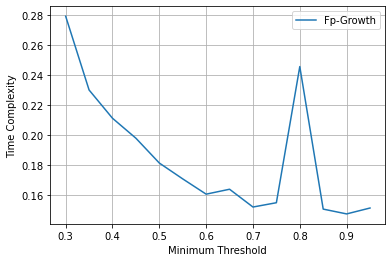

In [ ]:
plt.xlabel('Minimum Threshold')
plt.ylabel('Time Complexity')
plt.plot(fpElements, fpTimes, label ='Fp-Growth')
plt.grid()
plt.legend()
plt.savefig('FpGrowthMushroom.pdf',bbox_inches='tight')
plt.show()

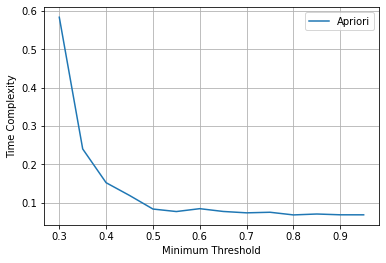

In [ ]:
plt.xlabel('Minimum Threshold')
plt.ylabel('Time Complexity')
plt.plot(apElements, apTimes, label ='Apriori')
plt.grid()
plt.legend()
plt.savefig('AprioriMushroom.pdf',bbox_inches='tight')
plt.show()

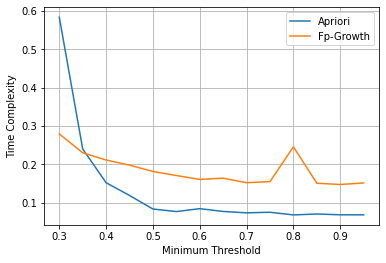

In [ ]:
plt.xlabel('Minimum Threshold')
plt.ylabel('Time Complexity')
plt.plot(apElements, apTimes, label ='Apriori')
plt.plot(fpElements, fpTimes, label ='Fp-Growth')
plt.grid()
plt.legend()
plt.savefig('mushroomcombine.pdf',bbox_inches='tight')
plt.show()

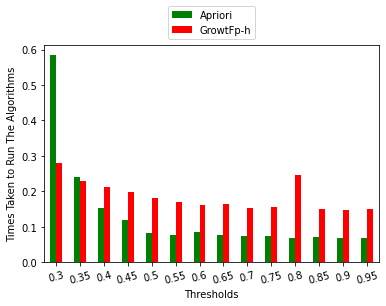

In [ ]:
data={"Apriori":apTimes,"GrowtFp-h":fpTimes}
index = [0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.70,0.75,0.80,0.85,0.90,0.95]
dataFrame = pd.DataFrame(data=data, index=index)

 
my_colors = ['green','red']
# Draw a vertical bar chart

dataFrame.plot.bar(rot=15,color=my_colors);
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.2))
plt.ylabel("Times Taken to Run The Algorithms")
plt.xlabel("Thresholds")
plt.savefig('Mushroom.pdf',bbox_inches='tight')

plt.show(block=True);